## 1 Accessing Text Corpora

## 1.1 Gutenberg Corpus

In [1]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [3]:
len(emma)

192427

In [4]:
## concordance
emma_text = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma_text.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [6]:
from nltk.corpus import gutenberg
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # including spaces
    num_words = len(gutenberg.words(fileid)) # including punctuation
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


## 1.2 Web and Chat Text

In [7]:
# web texts from firefox
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [8]:
# corpus of instant messaging chat sessions
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')


In [9]:
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

## 1.3 Brown Corpus
- first million-word electronic corpus of English

In [10]:
# categories
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [11]:
brown.words(categories='science_fiction')

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

In [12]:
brown.sents(categories=['mystery', 'science_fiction'])

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

In [13]:
# most frequent modal verbs
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = brown.categories()
modals = ['can', 'could', 'may', 'might', 'must', 'will']
wh_words = ['what', 'when', 'where', 'who', 'why']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


- most frequent modal in science fiction is `could`

In [14]:
cfd.tabulate(conditions=genres, samples=wh_words)

                 what  when where   who   why 
      adventure   110   126    53    91    13 
 belles_lettres   244   252   107   452    36 
      editorial    84   103    40   172    10 
        fiction   128   133    76   103    18 
     government    43    56    46    74     6 
        hobbies    78   119    72   103    10 
          humor    36    52    15    48     9 
        learned   141   227   118   212    20 
           lore   130   182    97   259    25 
        mystery   109   114    59    80    25 
           news    76   128    58   268     9 
       religion    64    53    20   100    14 
        reviews    44    54    25   128     9 
        romance   121   126    54    89    34 
science_fiction    27    21    10    13     4 


- most frequent wh word in romance is `when`

## 1.4 Reuters Corpus
- Contains 10788 news documents: in total 1.3 million words

In [15]:
from nltk.corpus import reuters
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [16]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

## 1.5 Inaugural address corpus

In [17]:
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

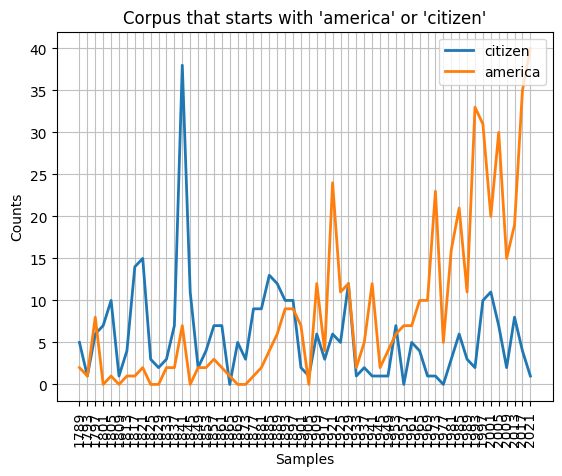

In [22]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot(title="Corpus that starts with 'america' or 'citizen'");

## 1.6 Loading your own corpus

In [23]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['README', 'connectives', 'propernames', 'web2', 'web2a', 'words']

## 1.7 Generating Random Text with Bigrams

In [27]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

## List of stopwords

In [29]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [30]:
print(len(stopwords))
print(stopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

## WordNet

In [31]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [33]:
## diffrerent meanings of motorcar
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [34]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [35]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

In [36]:
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

> `hyponyms`: They are child of a node

> `hypernyms`: They are parent of a node

> `root_hypernyms`: Gives us root of the node

In [37]:
## hyponyms
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[26]

Synset('used-car.n.01')

In [38]:
## hypernyms
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [39]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]